# <center> Arithmetic and Bitwise Operation

In [6]:
# importing required libraries and functions
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
def image_show(window_name,image):
    cv2.imshow(window_name,image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def image_show_multiple(window_name,image):
    for i,item in enumerate(window_name):
        cv2.imshow(window_name[i],image[i])
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def image_plot_multiple(title,image):
    L=len(title)
    ncols=min(L,3)
    nrows=int(np.ceil(L/ncols))
    plt.subplots(nrows,ncols,figsize=(5*ncols,nrows*5))
    for i,item in enumerate(title):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB))
        plt.title(title[i])

## Addition and Subtraction of images (<b> cv2.add, cv2.sub, cv2.addWeighted </b>)
### For images of same size or operation after resizing images to same size

(183, 275) (183, 275)


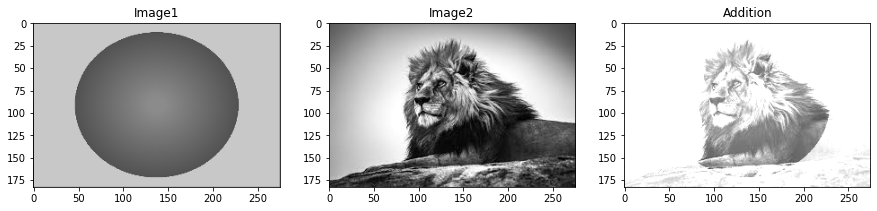

In [7]:
horse_image=os.path.join('images','Dreaming_about_a_horse.jpg')
lion_image=os.path.join('images','lion.jpeg')
image1 = cv2.imread(os.path.join('images','grad.png'),0)
image2 = cv2.imread(lion_image,0)
image1=cv2.resize(image1,(image2.shape[1],image2.shape[0]),interpolation=cv2.INTER_CUBIC)
print(image1.shape, image2.shape)
image_added=cv2.add(image1,image2)
image_plot_multiple(['Image1','Image2','Addition'],[image1, image2, image_added])

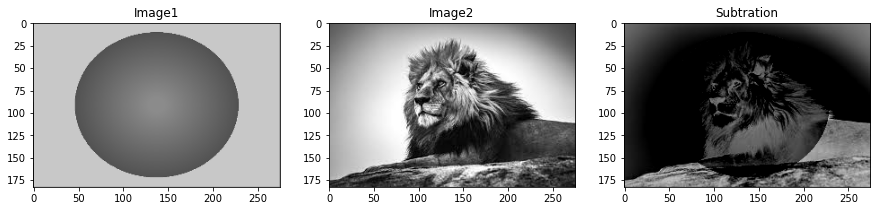

In [8]:
image_sub=cv2.subtract(image1,image2)
image_plot_multiple(['Image1','Image2','Subtration'],[image1, image2, image_sub])

### Weighted addition and substraction (Blending)

(183, 275) (183, 275)


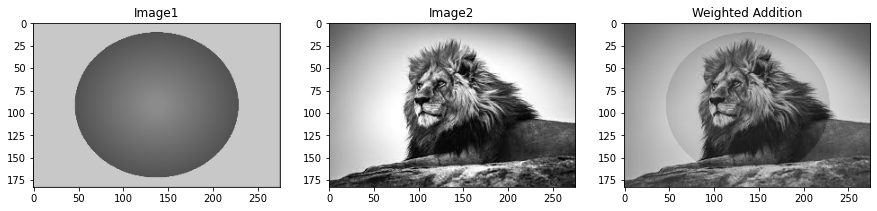

In [9]:
lion_image=os.path.join('images','lion.jpeg')
image1 = cv2.imread(os.path.join('images','grad.png'),0)
image2 = cv2.imread(lion_image,0)
image1=cv2.resize(image1,(image2.shape[1],image2.shape[0]),interpolation=cv2.INTER_CUBIC)
print(image1.shape, image2.shape)
image_Wadded=cv2.addWeighted(image1,0.2,image2,0.7,0)
image_plot_multiple(['Image1','Image2','Weighted Addition'],[image1, image2, image_Wadded])

(183, 275) (183, 275)


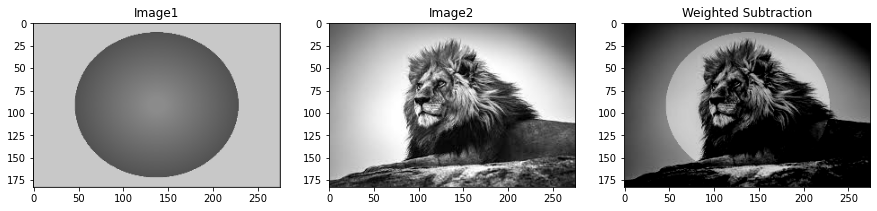

In [10]:
lion_image=os.path.join('images','lion.jpeg')
image1 = cv2.imread(os.path.join('images','grad.png'),0)
image2 = cv2.imread(lion_image,0)
image1=cv2.resize(image1,(image2.shape[1],image2.shape[0]),interpolation=cv2.INTER_CUBIC)
print(image1.shape, image2.shape)
image_Wsub=cv2.addWeighted(image1,-0.5,image2,1,0)
image_plot_multiple(['Image1','Image2','Weighted Subtraction'],[image1, image2, image_Wsub])

### For images with different sizes 

Blending a smaller image with a region of the larger image. 
    
We can crop a region in larger image, blend it with the smaller image and then paste the blended image back.

In [11]:
image1 = cv2.imread(horse_image,0)
image2 = cv2.imread(lion_image,0)

print('The size of the horse image is', image1.shape)
print('The size of the lion image is', image2.shape)

The size of the horse image is (450, 600)
The size of the lion image is (183, 275)


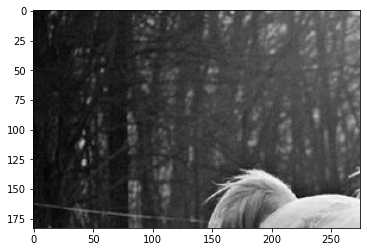

In [12]:
# Crop a region in the horse image equal to the size of the lion image

start_point=[0,0]
width=image2.shape[1]
height=image2.shape[0]
cropped_region=image1[start_point[1]:start_point[1]+height,start_point[0]:start_point[0]+width]
plt.imshow(cropped_region,'gray')

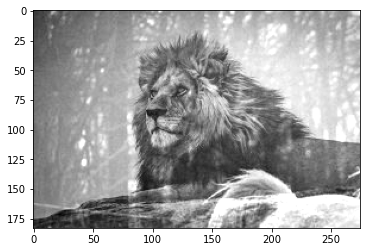

In [13]:
#blending lion with the cropped region
image_W=cv2.addWeighted(image2,0.6,cropped_region,1,0)
plt.imshow(image_W,'gray')

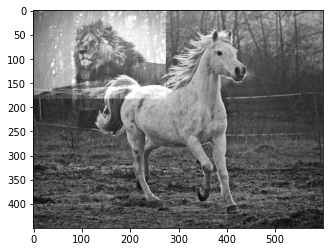

In [14]:
image1[start_point[1]:start_point[1]+height,start_point[0]:start_point[0]+width]=image_W
plt.imshow(image1,'gray')

## Bitwise Operation on Images

### Bitwise_AND 
This operation only considers pixels that are common with two images and remaining pixels are removed from the output image. 

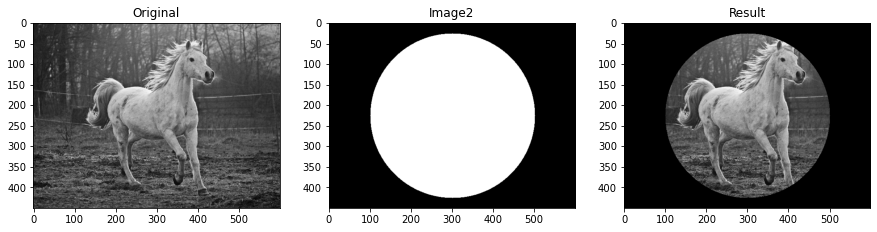

In [15]:
horse_image=os.path.join('images','Dreaming_about_a_horse.jpg')
horse_img=cv2.imread(horse_image,0)
img2= np.zeros(horse_img.shape,np.uint8)
cv2.circle(img2,(int(horse_img.shape[1]/2),int(horse_img.shape[0]/2)),200,255,-1)
image_res=cv2.bitwise_and(horse_img,img2,mask=None)
image_plot_multiple(['Original','Image2','Result'],[horse_img,img2,image_res])

### Bitwise_OR
This operation merges the two images.

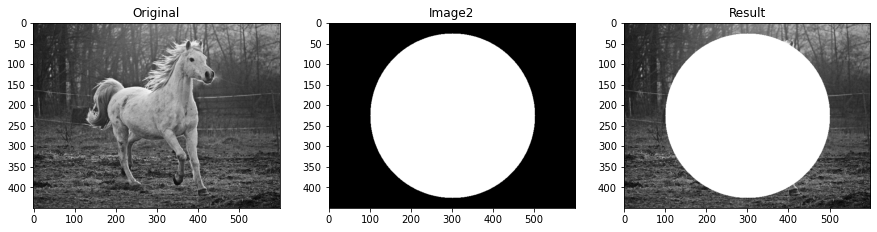

In [16]:
horse_image=os.path.join('images','Dreaming_about_a_horse.jpg')
horse_img=cv2.imread(horse_image,0)
img2= np.zeros(horse_img.shape,np.uint8)
cv2.circle(img2,(int(horse_img.shape[1]/2),int(horse_img.shape[0]/2)),200,255,-1)
image_res=cv2.bitwise_or(horse_img,img2,mask=None)
image_plot_multiple(['Original','Image2','Result'],[horse_img,img2,image_res])

### Bitwise_XOR
This function inverts the pixels which are intersected in two images and the rest of the pixels remains the same. 

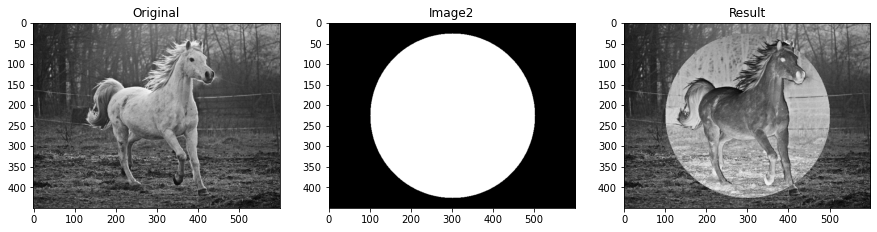

In [17]:
horse_image=os.path.join('images','Dreaming_about_a_horse.jpg')
horse_img=cv2.imread(horse_image,0)
img2= np.zeros(horse_img.shape,np.uint8)
cv2.circle(img2,(int(horse_img.shape[1]/2),int(horse_img.shape[0]/2)),200,255,-1)
image_res=cv2.bitwise_xor(horse_img,img2,mask=None)
image_plot_multiple(['Original','Image2','Result'],[horse_img,img2,image_res])


### Bitwise_NOT 
This function inverts the pixels in an image

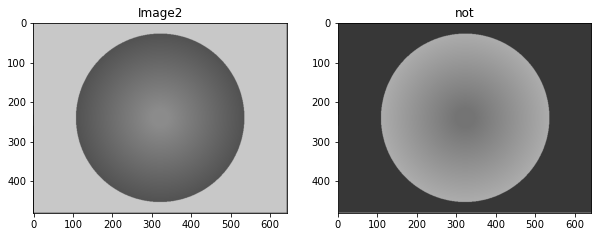

In [18]:
image1 = cv2.imread(os.path.join('images','grad.png'),0)
img2n=cv2.bitwise_not(image1)
image_plot_multiple(['Image2','not'],[image1,img2n])

# <center> Thank you